# Functions
*Developed by Nuno M.C. da Costa*

info: 
- https://docs.python.org/3/tutorial/controlflow.html#defining-functions
- http://mbakker7.github.io/exploratory_computing_with_python/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Functions
Functions are an essential part of a programming language.
You already used many functions like `print()`, `int()`, `str()`, and others.

But you can also define your own functions.
To define a new function, use the `def` command. After `def` follows the name of the function and then between parentheses the arguments of the function and finally a colon. After the colon you indent until you are done with the function. 

The last line of the function should be `return` followed by what you want to return. For example, consider the following function of $x$:

$f(x)= \cos(x) \qquad x <0$

$f(x) = \exp(-x) \qquad x \ge 0$

Let's implement $f(x)$ in a function called `func`. There is one input argument: $x$. 

In [4]:
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

print(func(6))

0.0024787521766663585


Once you define a function in Python, you can call it whenever you want during the session. So we can call it again

In [5]:
print(func(-2))

-0.4161468365471424


If you type

`func(` and then hit [shift-tab]

and wait a split second, the input arguments of the function pop-up in a little window, just like for other functions we already used. You can also provide additional documentation of your function. Put the documentation at the top of the indented block and put it between triple double quotes (`"""`). Run the code below to define the function `func` with the additional documentation, then in the code cell below type 

`func(` 

and hit [shift][tab] to see the additional documentation. Warning: don't leave a code cell with just `func(` or `func()` as you will get an error on [Kernel][Restart & Run All Cells].

In [6]:
def func(x):
    """First Python function
    written by Student X"""
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

In [ ]:
func()

The names of the arguments of a function are the names used inside the function. They have no relationship to the names used outside the function. When using a variable as the argument of a function, only the *value* gets passed to the function. In the example below, the *value* of `y` is passed as the first argument of the function `func`. Inside the function, this value is used for the variable `x`.

In [5]:
y = 2
print('func(2):', func(y))

func(2): 0.1353352832366127


### Packages - library of functions
A package is a set of Python functions. When we want to use a function from a package, we need to import it. There are many different ways to import packages. The most basic syntax is

`import numpy`

after which any function in `numpy` can be called as `numpy.function()`. If you don't like the name of the package, for example because it is long, you can change the name. The `numpy` package is renamed to `np` by typing

`import numpy as np`

after which all functions in `numpy` can be called as `np.function()`. 

Packages can also have subpackages. For example, the `numpy` package has a subpackage called `random`, which has a bunch of functions to deal with random variables. If the `numpy` package is imported with `import numpy as np`, functions in the `random` subpackage can be called as `np.random.function()`. 

If you only need one specific function, you don't have to import the entire package. For example, if you only want the cosine function of the numpy package, you may import it as `from numpy import cos`, after which you can simply call the cosine function as `cos()`. You can even rename functions when you import them. For example, after `from numpy import cos as newname`, you can call the function `newname()` to compute the cosine (I know, pretty silly, but this can become handy). 

In [1]:
#example
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<a href="#ex1answer">Answer to Exercise 1</a>

### Keyword arguments
Functions may have multiple input arguments followed by keyword arguments. Arguments *must* be entered and must be entered in the order defined. Keyword arguments don't need to be entered. When they are not entered, the default value is used. Keyword arguments may be given in any order as long as they come after the regular arguments. If you specify the keyword arguments in the order they are defined in the argument list, you don't even need to preceed them with the keyword, but it is saver to write the keywords out and it makes your code easier to read. For example, the function $f(x)=A\cos(\pi x+\theta)$ can be written with keyword arguments for $A$ and $\theta$ as follows.

In [6]:
def testfunc(x, A=1, theta=0):
    return A * np.cos(np.pi * x + theta)

print(testfunc(1))  # Uses default A=1, theta=0: cos(pi)
print(testfunc(1, A=2))  # Now A=2, and theta is still 0: 2*cos(pi)
print(testfunc(1, A=2, theta=np.pi / 4))  # Now A=2, theta=pi/4: 2*cos(5pi/4)
print(testfunc(1, theta=np.pi / 4, A=2))  # Same as above: 2*cos(5pi/4)
print(testfunc(1, theta=np.pi / 4))  # Now theta=pi/4, and A is still 1: cos(5pi/4)

-1.0
-2.0
-1.4142135623730954
-1.4142135623730954
-0.7071067811865477


Note that the proper style was applied, as defined in Notebook 1: there are spaces around mathematical symbols, but not around the equal sign of the keyword argument. 

### Global and Local variables
Variables declared inside a function can only be used inside that function. The outside of a function doesn't know about the variables used inside the function, except for the variables that are returned by the function. In the code below, remove the `#` before `print(a)` and you will get an error message, as `a` is a local variable inside the function `localtest` (then put the `#` back, else you get an error when running [Kernel][Restart & Run All Cells]).

In [11]:
GLOBAL_1 = 5
def localtest(x):
    local_a = 3
    local_b = 5
    return local_a * x + local_b + GLOBAL_1
GLOBAL_2 = localtest(GLOBAL_1)
print(GLOBAL_2)

25


In [12]:
print(GLOBAL_1)
print(GLOBAL_2)

5
25


In [13]:
print(a)  # Will cause an error, as 'a' is not known outside function 

NameError: name 'a' is not defined

#### Three types of variables inside a function: Argument, GLOBAL(outside) and local
When a variable is used inside a Python function, Python first checks whether the variable has been defined locally. If not, it checks whether the variable is passed to the function through the argument list. And if that is not the case, Python checks whether the variable is defined outside  the function (`GLOBAL` variable), from the place the function was called. (NOTE: good coding uses only local variables and arguments inside functions)

Note that when a variable is defined locally, Python will not check whether that variable is also declared outside the function. It will happily create a new variable with the same name inside the function. It is important to realize the difference between these different types, so let's do a few examples:

In [8]:
# This function works properly
def test1(x):
    a = 3
    b = 5
    return a * x + b

print(test1(4))

# This function also works, but it is sloppy coding
# since variable a is defined outside the function
a = 3

def test2(x):
    b = 5
    return a * x + b

print(test2(4))  

17
17


In [9]:
var1 = 8

def test3():
    var1 = 4 #the function prioritizes this definition
    print('Inside the function test3, var1 equals:', var1)
    
test3()
print('Value of var1 outside test3:', var1)

Inside the function test3, var1 equals: 4
Value of var1 outside test3: 8


### Return multiple *things*
An assignment can assign values to multiple variables in one statement, for example

In [13]:
a, b = 4, 3
print('a:', a)
print('b:', b)

a, b, c = 27, np.arange(4), 'hello'
print('a:', a)
print('b:', b)
print('c:', c)

d, e, f = np.arange(0, 11, 5)
print('d:', d)
print('e:', e)
print('f:', f)

a: 4
b: 3
a: 27
b: [0 1 2 3]
c: hello
d: 0
e: 5
f: 10


Similarly, a function may return one value or one array. Or a function may return multiple values, multiple arrays, or whatever the programmer decides to return (including nothing, of course). When multiple *things* are returned, they are returned as a tuple. They can be stored as a tuple, or, if the user knows how many *things* are returned, they can be stored in individual variables right away, as in the example below.

In [14]:
def newfunc():
    dump = 4 * np.ones(5)
    dump[0] = 100
    return 33, dump, 'this works great!'

test = newfunc()
print(type(test))
print(test[1]) 

a, b, c = newfunc()
print('a:', a)
print('b:', b)
print('c:', c)

<class 'tuple'>
[100.   4.   4.   4.   4.]
a: 33
b: [100.   4.   4.   4.   4.]
c: this works great!


### Interactive functions using `ipywidgets` (Extra from Jupyter editor)
The package `ipywidgets` constains widgets for use in Jupyter Notebooks. We will start here by using the simplest form, which is the `interact` function. The `interact` function can be used to, you guessed it, interact with a function. The `interact` function is a bit slow when interacting with a graph, but other than that it works nicely. 

For it to work go to anaconda prompt and copy paste: 
- `conda activate iclasses`
- `conda install ipywidgets`

For example, let's write a function that plots a line with length $L$ that makes an angle $\alpha$ with the horizontal. The angle $\alpha$ is an input argument.

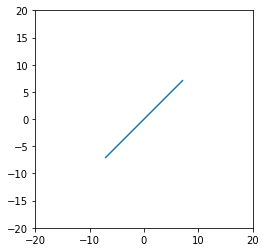

In [2]:
def plot_line(alpha):
    L = 20
    x = L / 2 * np.cos(np.deg2rad(alpha))
    y = L / 2 * np.sin(np.deg2rad(alpha))
    plt.plot([-x, x], [-y, y])
    plt.axis('scaled')
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    
plot_line(45)

The `interact` function of `ipywidgets` can now be used to interact with the `plot_line` function we just defined. The `interact` function takes as input arguments the name of the function to interact with, and then the minimum value,  maximum value, and step of the input arguments. When you execute the code below, a slider will appear and you can move the slider to change the value of the angle $\alpha$ (and again, it is a bit slow, so don't move it around too quickly). 

In [4]:
from ipywidgets import interact
interact(plot_line, alpha=(-180, 180, 5)); 

interactive(children=(IntSlider(value=0, description='alpha', max=180, min=-180, step=5), Output()), _dom_clas…

The `plot_line` function can be modified to also take the color of the line as an input argument. 

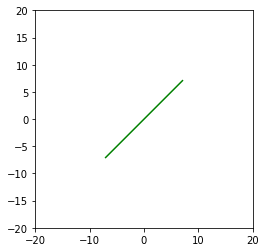

In [5]:
def plot_line(alpha, color='g'):
    L = 20
    x = L / 2 * np.cos(np.deg2rad(alpha))
    y = L / 2 * np.sin(np.deg2rad(alpha))
    plt.plot([-x, x], [-y, y], color)
    plt.axis('scaled')
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    
plot_line(45)

The `interact` function can be used to both change the value of $\alpha$ and the color of the line. Provide all the possible colors as a list, which will appear as a dropdown box when executing the code. 

In [6]:
from ipywidgets import interact
interact(plot_line, alpha=(-180, 180, 5), color=['orange', 'brown', 'fuchsia']); 

interactive(children=(IntSlider(value=0, description='alpha', max=180, min=-180, step=5), Dropdown(description…

### Exercise 1. <a name="back0"></a> Steps for creating a function

Given the price of a rectangular field, as well as the measurements of two adjacent sides, it is intended to know whether its price, per square meter, is above or below the average price in the area.

#### Solution planning (step 1)
The most imediate and abstract way to plan the solution to the problem.

Advantage: organize solution

Data:
- 6 `float` vars: price, price_m2, price_mean_m2, length, width

Result:
- Field price per square meter is above or below

Relations:
- area = length x width
- price_m2 = price / area
- if,  price_m2 > price_mean_m2, then, “price superior”
- else, if price_m2 < price_mean_m2, then, “below mean”
- else, “price are the same”

#### Peseucode(step 2)
The most imediate and abstract way to plan the code.

Advantage: organize code

In [14]:
Algorithm: price_m2_rectangle
Vars:price, price_m2, price_mean_m2, length, width

start
    read(price, price_mean_m2, length, width)
    area=length*width #m2 
    price_m2=price / area #euros/m2
    if price_m2 > price_mean_m2, then:
        write(“price superior”)
    else if price_m2 < price_mean_m2, then:
        write(“below mean”)
    else, then:
        write(“price are the same”)
end

SyntaxError: invalid syntax (Temp/ipykernel_20148/2665437585.py, line 2)

#### Simple Representation (step 3)
The most simple way to represent code.

Advantage: simple and easy writing.

In [16]:
#Atribute values: (you can declare variables while atributing values)
price = input("Insert the price in euros!") #input() returns string value
price = float(price) #euros  #convert the string to integer using the function int()
price_mean_m2= float(4) #euros/m2
length = float(100) #m
width = float(100) #m
area=length*width #m2 
price_m2=price / area #euros/m2
print('price_m2: ',price_m2, ';',' price_mean_m2: ', price_mean_m2) #for debug
#Condicoes:
if price_m2 < price_mean_m2:
    print("Mean price is superior!")
else:
    if price_m2 > price_mean_m2:
        print("Mean price is inferior!")
    else:
        print("Price are the same!")

Insert the price in euros! 50000


price_m2:  5.0 ;  price_mean_m2:  4.0
Mean price is inferior!


#### Function Representation (step 4)
The way to reuse code. We are basically incapsulating the code inside of a function.
After doing the simple representation and the algorithm is working, the best practice to save our algorithm is to put inside of a function. This will help to organize our code as the lines of code become bigger, and we can call our algorithm whenever we want. (Next lessons will detail this further)

Advantage: 
- Easy maintance of code.
- Reuse code whenever we want.
- Debug is easier.
- The code is better structured.

<a href="#ex0answer">Answer to Exercise 1</a>

### Exercise 2. <a name="back1"></a>First function
Write a Python function for the following function:

$f(x)=e^{-\alpha x}\cos(x)$

The function should take `x` and `alpha` as input arguments and return the function value. Give your function a unique name (if you also call it `func` it will overwrite the `func` function that we defined above). Make a plot of $f(x)$ vs. $x$ for $x$ going from 0 to $10\pi$ using two different values of $\alpha$: 0.1 and 0.2. Add a legend and label the axes.

<a href="#ex1answer">Answer to Exercise 2</a>

### Exercise 3. <a name="back7"></a> First wiget

Write a function that plots $a\cos(x)$ and $b\sin(x)$ on the same graph for $x$ going from $0$ to $4\pi$. Set the limits of the vertical axis from -5 to +5. Input arguments of the function are the amplitudes $a$ and $b$, the color of the cosine function, and the color of the sine function (so 4 input arguments in total). Use the interact function to allow $a$ and $b$ to vary from 0 to 5, the color of the cosine function to be orange, pink or red, and the colors of the sine function to be blue, grey or black. 

<a href="#ex7answer">Answer to Exercise 3</a>

### Answers to the exercises

<a name="ex0answer">Answer to Exercise 1</a>

In [12]:
def price_m2_rectangle(price, price_mean_m2, length=float(100), width=float(100)):
    """
    Price per m2 of a rectangular field.

    Parameters
    ----------
    price : float
        Total price of the rectangle
    price_mean_m2 : float
        Mean m2 of rectangle in the area of Braga
    length : float
        Rectangle length. default 100.0 m
    width : float
        Rectangle width. default 100.0 m

    Returns
    -------
    price_m2 : float
        Price per m2 of the rectangle
    """
    
    area=length*width #m2 #Local variable
    price_m2=price / area #euros/m2 #Local variable
    print('price_m2: ',price_m2, ';',' price_mean_m2: ', price_mean_m2) #for debug
    #Condicoes:
    if price_m2 < price_mean_m2:
        print("Mean price is superior!")
    else:
        if price_m2 > price_mean_m2:
            print("Mean price is inferior!")
        else:
            print("Price are the same!")
            
    return price_m2 #always use return in the function to close it

In [13]:
price = float(input("Insert the total price in euros!")) #GLOBAL variable pass 
price_mean_m2 = float(input("Insert the price per m2 in euros!")) #GLOBAL variable pass 
price_m2 = price_m2_rectangle(price, price_mean_m2) #execute function and return price_m2

Insert the total price in euros! 50000
Insert the price per m2 in euros! 4


price_m2:  5.0 ;  price_mean_m2:  4.0
Mean price is inferior!


<a name="ex1answer">Answer to Exercise 2</a>

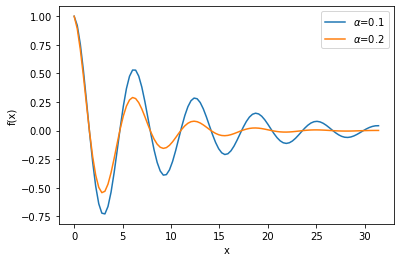

In [21]:
def test(x, alpha):
    return np.exp(-alpha * x) * np.cos(x)

x = np.linspace(0, 10 * np.pi, 100) #Array: Return evenly spaced numbers over a specified interval.
y1 = test(x, 0.1)  # This function can be called with an array
y2 = test(x, 0.2)
plt.plot(x, y1, label=r'$\alpha$=0.1')
plt.plot(x, y2, label=r'$\alpha$=0.2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();

 <a href="#back1">Back to Exercise 2</a>

<a name="ex7answer">Answer to Exercise 3</a>

In [7]:
def plot_func2(acos=1, asin=1, colorcos='C0', colorsin='C1'):
    x = np.linspace(0, 4 * np.pi)
    plt.plot(x, acos * np.cos(x), colorcos)
    plt.plot(x, asin * np.sin(x), colorsin)
    plt.ylim(-5, 5)
    
interact(plot_func2, acos=(0, 5, 0.5), asin=(0, 5, 0.5), 
         colorcos=['orange', 'pink', 'red'], 
         colorsin=['blue', 'grey', 'black']);

interactive(children=(FloatSlider(value=1.0, description='acos', max=5.0, step=0.5), FloatSlider(value=1.0, de…

<a href="#back7">Back to Exercise 3</a>